# Project - California Housing Price Prediction

**Description :**

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

*Background of the Problem Statement :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

*Domain : Finance and Housing*

*Dataset Description :*

*Data Dictionary – Variable and Description*

● longitude (signed numeric - float) : Longitude value for the block in California, USA ● latitude (numeric - float ) : Latitude value for the block in California, USA ● housing_median_age (numeric - int ) : Median age of the house in the block ● total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block ● total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block ● population (numeric - int ) : Count of the total number of population in the block ● households (numeric - int ) : Count of the total number of households in the block ● median_income (numeric - float ) : Median of the total household income of all the houses in the block ● ocean_proximity (numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]

● median_house_value (numeric - int ) : Median of the household prices of all the houses in the block

Dataset Size : 20640 rows x 10 columns

Questions to be answered with analysis :

Build a model of housing prices to predict median house values in California using the provided dataset.

Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

Predict housing prices based on median_income and plot the regression chart for it.

Project Guidelines :

*1. Load the data :*

● Read the “housing.csv” file from the folder into the program.

● Print first few rows of this data.

● Extract input (X) and output (Y) data from the dataset.

*2. Handle missing values :*

● Fill the missing values with the mean of the respective column.

*3. Encode categorical data :*

● Convert categorical column in the dataset to numerical data.

*4. Split the dataset :*

● Split the data into 80% training dataset and 20% test dataset.

*5. Standardize data :*

● Standardize training and test datasets.

*6. Perform Linear Regression :*

● Perform Linear Regression on training data.

● Predict output for test dataset using the fitted model.

● Print root mean squared error (RMSE) from Linear Regression. [ HINT: Import mean_squared_error from sklearn.metrics ]

*7. Perform Decision Tree Regression :*

● Perform Decision Tree Regression on training data.

● Predict output for test dataset using the fitted model.

● Print root mean squared error from Decision Tree Regression.

*8. Perform Random Forest Regression :*

● Perform Random Forest Regression on training data.

● Predict output for test dataset using the fitted model.

● Print RMSE (root mean squared error) from Random Forest Regression.

*9. Bonus exercise: Perform Linear Regression with one independent variable :*

● Extract just the median_income column from the independent variables (from X_train and X_test).

● Perform Linear Regression to predict housing values based on median_income.

● Predict output for test dataset using the fitted model.

● Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [1]:
import sys
import platform
import operator
from math import *
import string
from pandas import Series, DataFrame
import time

import scipy
import numpy
import matplotlib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
housing = r"C:\\Users\\Ansari\\Downloads\\Datasets\\housing.csv"

In [3]:
# Read the csv file
df = pd.read_csv(housing, low_memory=False)

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [7]:
List_of_Labels = list(df['median_house_value'].head(10))
List_of_Labels

[452600,
 358500,
 352100,
 341300,
 342200,
 269700,
 299200,
 241400,
 226700,
 261100]

* Note :*

**1.It is a 'Regression' problem because the label 'median_house_value' is continuous

**2.We will apply all types of regression and predict the median_house_value

**3.We will compare which type of regression is best for this prediction

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [9]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Check for Nan values**

In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

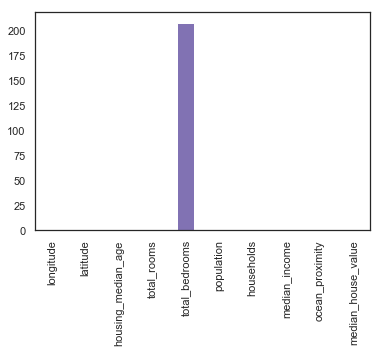

In [12]:
df.isnull().sum().plot(kind = 'bar')

In [13]:
# filling zero on the place of NaN values in the data set 
df['total_bedrooms'].fillna(0,inplace = True)

In [14]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [16]:
df[df['median_house_value']>450000]['median_house_value'].value_counts().head()

500001    965
500000     27
475000      8
483300      6
466700      4
Name: median_house_value, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028B36FC1710>,
      dtype=object)

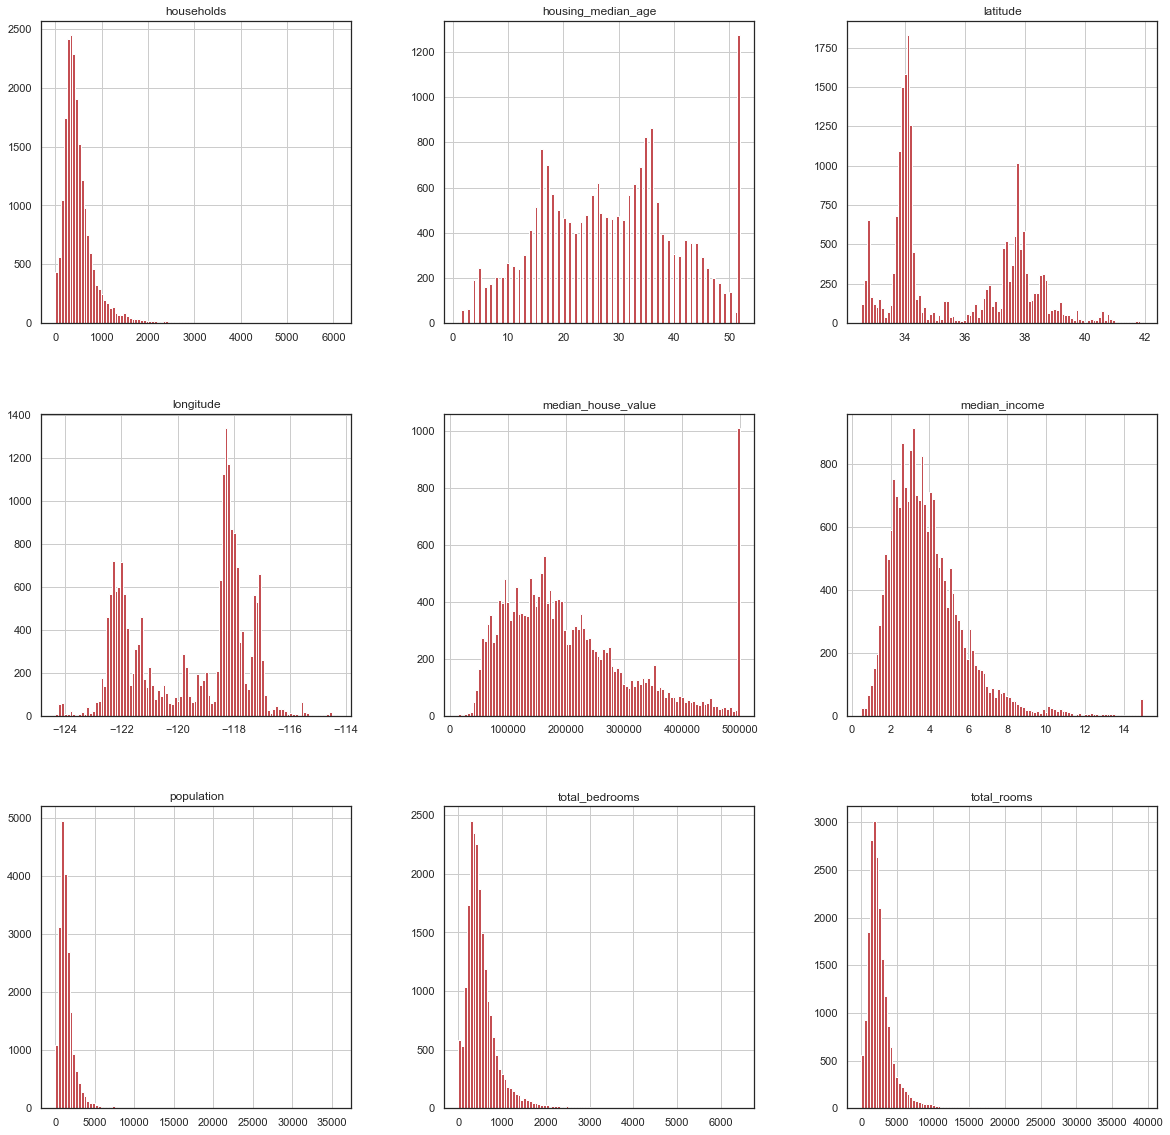

In [17]:
df.hist(bins=100, figsize=(20,20) , color = 'r')

**Data Preprocessing**:

In [19]:
x=df.iloc[:,:-1].values
print(x)

[[-122.23 37.88 41 ... 126 8.3252 'NEAR BAY']
 [-122.22 37.86 21 ... 1138 8.3014 'NEAR BAY']
 [-122.24 37.85 52 ... 177 7.2574 'NEAR BAY']
 ...
 [-121.22 39.43 17 ... 433 1.7 'INLAND']
 [-121.32 39.43 18 ... 349 1.8672 'INLAND']
 [-121.24 39.37 16 ... 530 2.3886 'INLAND']]


In [20]:
y=df['median_house_value'].values
print(y)

[452600 358500 352100 ...  92300  84700  89400]


**Encoding the categorical values**

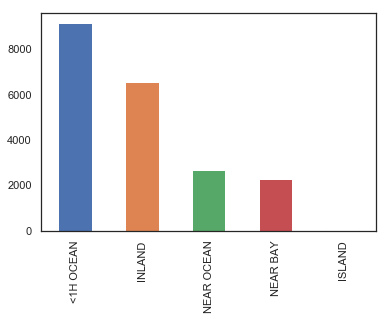

In [21]:
df['ocean_proximity'].value_counts().plot(kind = 'bar')

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:, 8] = labelencoder.fit_transform(x[:, 8])
onehotencoder = OneHotEncoder(categorical_features = [8])
x = onehotencoder.fit_transform(x).toarray()

In [38]:
# Split the dataset :
# Split the data into 80% training dataset and 20% test dataset.

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
print('xtrain :')
print(xtrain)
print('xtest :')
print(xtest)

xtrain :
[[0.0000e+00 0.0000e+00 0.0000e+00 ... 2.3000e+03 6.2300e+02 3.2596e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.3140e+03 7.5600e+02 3.8125e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 9.1500e+02 3.3600e+02 4.1563e+00]
 ...
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.7560e+03 5.2700e+02 2.9344e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.7770e+03 5.5900e+02 5.7192e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 2.6190e+03 1.2420e+03 2.5755e+00]]
xtest :
[[0.0000e+00 1.0000e+00 0.0000e+00 ... 1.3920e+03 3.5900e+02 1.6812e+00]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 1.5650e+03 5.8400e+02 2.5313e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.3100e+03 9.6300e+02 3.4801e+00]
 ...
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.5850e+03 5.6800e+02 9.2298e+00]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 1.2270e+03 4.7400e+02 2.7850e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.6710e+03 4.4800e+02 3.5521e+00]]


In [25]:
print('ytrain :')
print(ytrain)
print('ytest :')
print(ytest)

ytrain :
[103000 382100 172600 ... 222100 283500 325000]
ytest :
[ 47700  45800 500001 ... 500001  72300 151500]


#Using the ML regression models on tarining data
#Predict the output for test dataset using the fitted model

# 6 - Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
ypred = linear_regressor.predict(xtest)
ypred

array([  9342.06190385,  79511.95194208, 210775.99249652, ...,
       439180.98341184, 120797.55240622, 183386.04993586])

In [28]:
from sklearn.metrics import mean_squared_error
predictions = linear_regressor.predict(xtest)
lin_mse = mean_squared_error(ytest,predictions)
lin_rmse = np.sqrt(lin_mse)
print('rmse value is : ',lin_rmse)

rmse value is :  71061.1018068545


In [29]:
lin_reg_score = linear_regressor.score(xtest,ytest)
print('r squared value is : ',lin_reg_score )

r squared value is :  0.6146485353921447


# 7 - Decision Tree Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [31]:
y_pred = tree_regressor.predict(xtest)
y_pred

array([ 76800.,  26600., 500001., ..., 500001.,  65600., 117600.])

In [32]:
from sklearn.metrics import mean_squared_error
predictions = tree_regressor.predict(xtest)
lin_mse = mean_squared_error(ytest,predictions)
lin_rmse = np.sqrt(lin_mse)
print('rmse value is : ',lin_rmse)

rmse value is :  70205.55403276323


In [33]:
tree_score = tree_regressor.score(xtest,ytest)
print('r squared value is : ',tree_score )

r squared value is :  0.6238716386342443


# 8 Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor
rn_forest_regressor = RandomForestRegressor(n_estimators=50,random_state=0)
rn_forest_regressor.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
rn_forest_regressor.predict(xtest)

array([ 76004.  , 182082.24, 437456.24, ..., 498234.96,  70538.  ,
       164656.  ])

In [36]:
from sklearn.metrics import mean_squared_error
predictions = rn_forest_regressor.predict(xtest)
lin_mse = mean_squared_error(ytest,predictions)
lin_rmse = np.sqrt(lin_mse)
print('rmse value is : ',lin_rmse)

rmse value is :  50002.829417957844


In [37]:
rsq_rn_forest = rn_forest_regressor.score(xtest,ytest)
print('r squared value is : ',rsq_rn_forest )

r squared value is :  0.8091982738734144


In [50]:
df = [lin_reg_score, tree_score, rsq_rn_forest]
index = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
pd.DataFrame(df, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
Random Forest Regressor,0.809198
Decision Tree Regressor,0.623872
Linear Regression,0.614649


* Random forest regression model has the highest score for r squared value 0.80.
* Random forest regression model is the best fit compared to Linear regression and Decision tree model.

# 9 Perform Linear Regression with one independent variable

In [40]:
# create X and y
#taking only one variable for now
feature_cols = ['median_income']
X = df[feature_cols]
y = df.median_house_value

In [57]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [58]:
# default split is 80% for training and 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14448, 1)
(14448,)
(6192, 1)
(6192,)


In [59]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# fit the model to the training data (learn the coefficients)
#linreg_sm = smdl.OLS(y_train, X_train).fit()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
linreg.coef_

array([42265.46471874])

In [61]:
linreg.intercept_

43989.053771095496

In [62]:
y_test.head()

4712     355000
2151      70700
15927    229400
82       112500
8161     225400
Name: median_house_value, dtype: int64

In [63]:
# Making predictions
# make predictions on the testing set
y_pred = linreg.predict(X_test)

# predict using sm
#y_pred_sm = linreg.predict(X_test)

In [64]:
y_pred

array([181351.81410701, 127607.04917066, 213608.81678035, ...,
       153308.67826612, 154293.46359407, 116191.14715012])

In [65]:
y_test

4712     355000
2151      70700
15927    229400
82       112500
8161     225400
6636     263000
17333    226800
19081    166200
13298    118000
7157     156300
15734    293800
12388     97500
13589     63500
3403     314900
11888     92400
7385     117200
18378    485000
6104     141900
6881     188500
16035    228600
18836     71200
9694     108500
16297     56400
15020    174400
14928    245200
9474      92600
19710    102400
391      256100
516      471600
12380    122500
          ...  
3641     181800
9769     114300
5947     283400
16401    181300
566      229800
19414    155900
8        226700
2827     237500
15169    159100
17187    456300
12995    135500
17612    351400
16009    346800
18191    360900
15994    358600
1508     234700
18913    123600
18471    229800
1470     265900
18503    390000
5290     500001
15031    147900
11680    195100
961      262900
14337    112500
11387    211300
2523      87500
18897    109800
18878    162500
4287     166700
Name: median_house_value

In [66]:
linreg.coef_

array([42265.46471874])

In [67]:
feature_cols

['median_income']

In [68]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('median_income', 42265.464718742216)]

In [69]:
linreg.intercept_

43989.053771095496

In [77]:
# y = 
43989.053771095496 + 181351.81410701

225340.8678781055

In [71]:
# summary report from sm
# linreg_sm.summary()

In [76]:
# Model evaluation metrics for regression

print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)

y-intercept             :  43989.053771095496
beta coefficients       :  [42265.46471874]
